

# A bike-sharing system case study

## Problem Statement:
    
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona 
pandemic.The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up 
with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and 
the economy restores to a healthy state. 

 
The company has gathered a large dataset on daily bike demands across the American market based on some factors. 
It wants to understand the factors on which the demand for these shared bikes depends.
Essentially, it wants to know:

    -Which variables are significant in predicting the demand for shared bikes.
    
    -How well those variables describe the bike demands.
    
    -To identify the variables affecting bike count, e.g season, yr,month,holiday etc.
    
    -To create a linear model that quantitatively relates bike counts(total rental bikes) 
    
    -To know the accuracy of the model, i.e. how well these variables can predict bike counts.

So interpretation is important!    

# Step 1: Reading and Understanding the Data

   

In [3]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [1]:
# Importing Libraries
import numpy as np
print('numpy version\t:',np.__version__)
import pandas as pd
print('pandas version\t:',pd.__version__)
import matplotlib.pyplot as plt
import seaborn as sns
print('seaborn version\t:',sns.__version__)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor


numpy version	: 1.20.3
pandas version	: 1.3.4
seaborn version	: 0.11.2


In [5]:
# Read the given CSV file

bike = pd.read_csv('day.csv')
bike.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspect the various aspects of the housing dataframe



In [6]:
bike.shape

(730, 16)

In [7]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [9]:
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

The bike dataset has no missing values.

In [10]:
# Drop 'instant','dteday','yr','casual' and 'registered'
# As instant column is the index which is a unique identifier.
# As dteday is not a time series the date is not important as it is unique for all days.
# As yr has only two values that is 0 and 1 it has no use for the management.
# As the target variable is cnt(i.e casual+ registered) so casual and registered will not impact in our analysis.
bike.drop(['instant','dteday','casual','registered'], axis = 1, inplace = True)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [11]:
bike.shape

(730, 12)

In [12]:
#Mapping variables season, month, weathersit, weekday
#Since these features are nominal variables so ordering is not important.

bike['season']=bike.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
bike['mnth']=bike.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bike['weathersit']=bike.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
bike['weekday']=bike.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [13]:
#Identify Continuous and Categorical Features
#Checking the unique values in the data
bike.nunique().sort_values()

yr              2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
mnth           12
temp          498
hum           594
windspeed     649
atemp         689
cnt           695
dtype: int64

# Step 2: Visualising the Data
    
Let's now spend some time doing what is arguably the most important step - understanding the data.

 -If there is some obvious multicollinearity going on, this is the first place to catch it.
 -Also identify if some predictors directly have a strong association with the outcome variable.

  We'll visualise our data using matplotlib and seaborn.

Visualising Numeric Variables
Let's make a pairplot of all the numeric variables

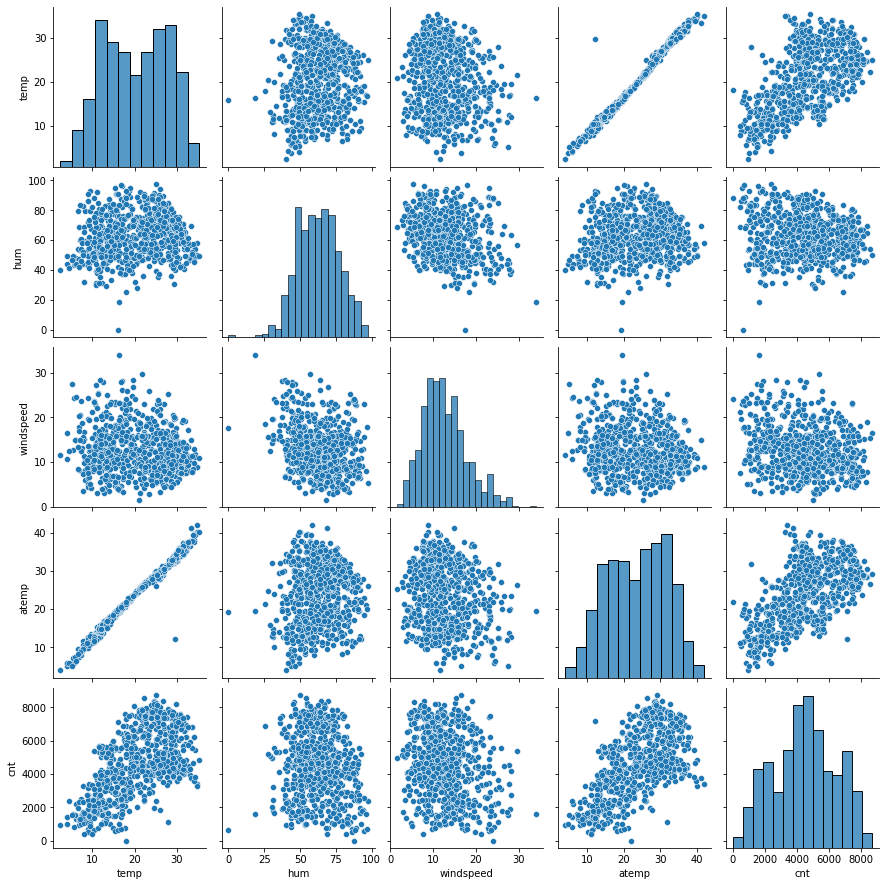

In [14]:
sns.pairplot(bike,vars=["temp", "hum",'windspeed','atemp','cnt'])
plt.show()

From the above figures there are some independent variables look positively correlated to the 'cnt' variable.

Visualising Categorical Variables
There are a few categorical variables are present so let's make a boxplot.



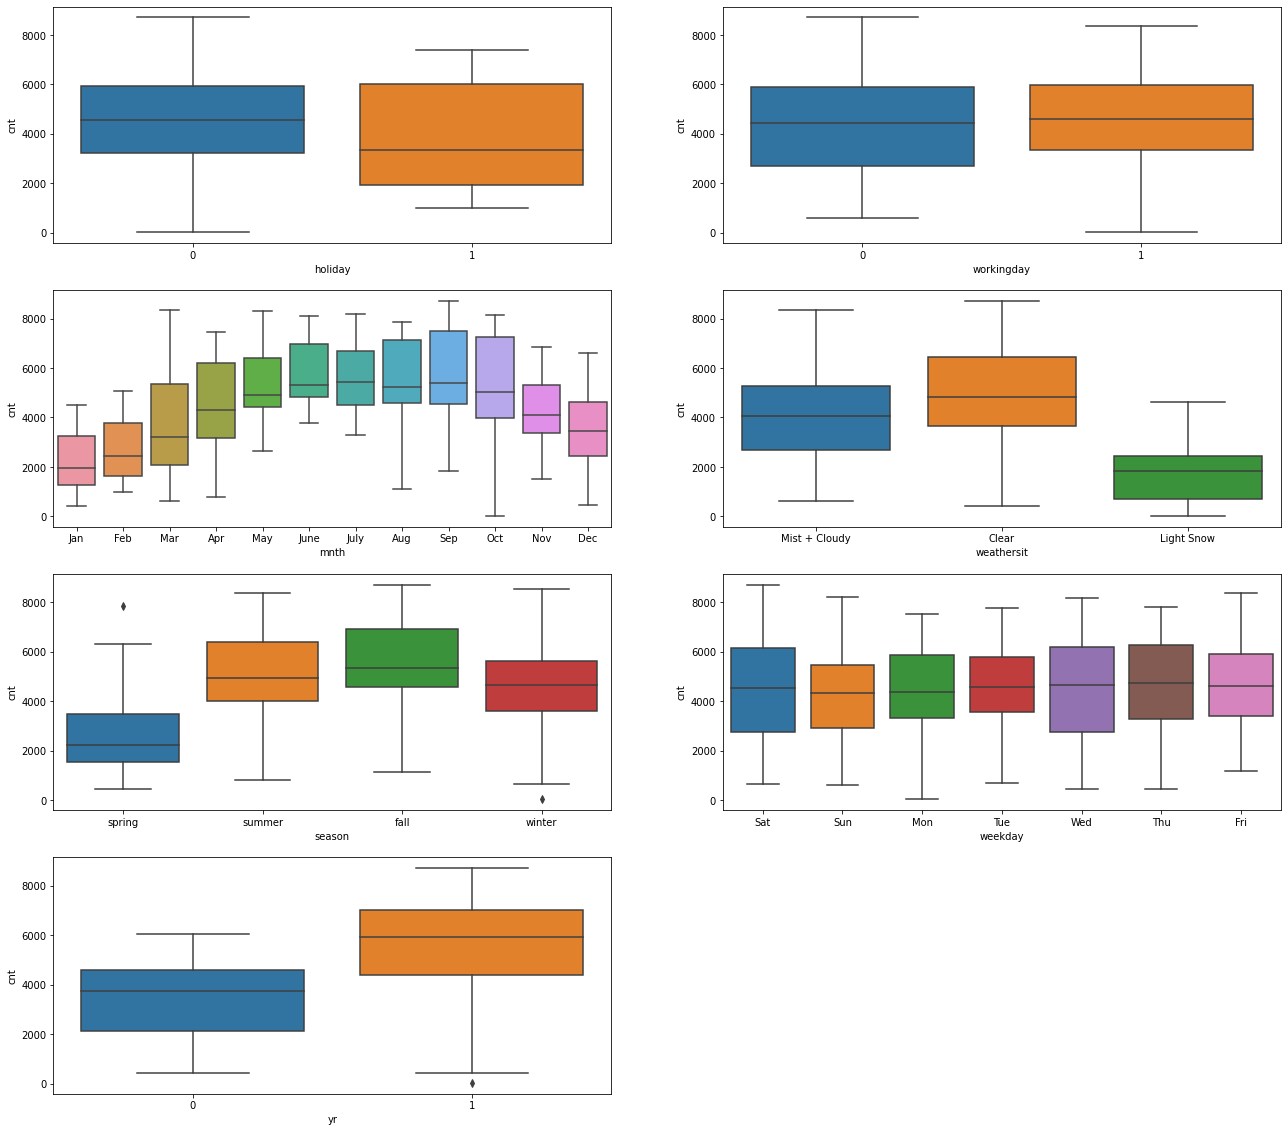

In [15]:
plt.figure(figsize=(22, 20))

plt.subplot(4,2,1)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)

plt.subplot(4,2,2)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)

plt.subplot(4,2,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)

plt.subplot(4,2,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)

plt.subplot(4,2,5)
sns.boxplot(x = 'season', y = 'cnt', data = bike)

plt.subplot(4,2,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)

plt.subplot(4,2,7)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)

plt.show()

The relationship between categorical variables and a Target variable shows that

Bike Demands are more :

-during the Fall season and then in summer

-in clear weathershit weather

-in year 2019


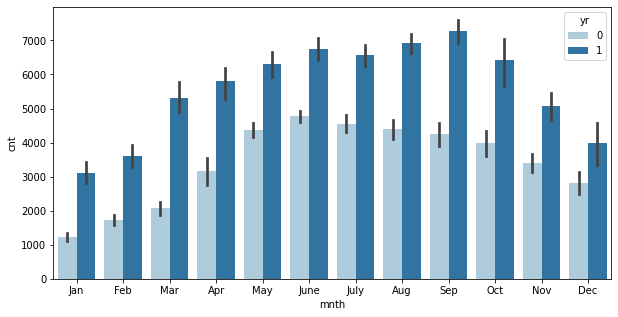

In [16]:
plt.figure(figsize=(10,5))
sns.barplot('mnth','cnt',hue='yr',data=bike,palette='Paired')
plt.show()

Bike Demands increases in the month of september in 2019.

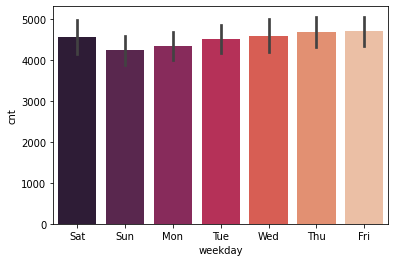

In [17]:
sns.barplot('weekday','cnt',data=bike,palette="rocket")
plt.show()

Bike Demands are more in saturday.

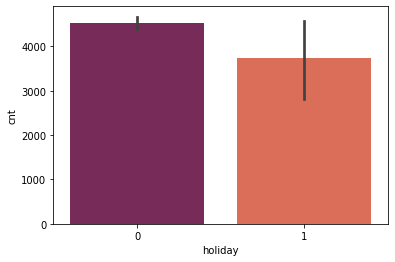

In [18]:
sns.barplot('holiday','cnt',data=bike,palette="rocket")
plt.show()

Bike Demands are more when it is not a holiday.

# Step 3: Data Preparation

 Since our data set has many string values, in order to fit a regression line, we would need numerical values and not string. 
Hence, we need to convert them .



In [19]:
#Dummy variables for month, season, weathersit, weekday)

mnths=pd.get_dummies(bike.mnth,drop_first=True)
weekdays=pd.get_dummies(bike.weekday,drop_first=True)
weather_sit=pd.get_dummies(bike.weathersit,drop_first=True)
seasons=pd.get_dummies(bike.season,drop_first=True)


In [20]:
#Add the results to the original bike dataframe

bike=pd.concat([mnths,weekdays,weather_sit,seasons,bike],axis=1)
bike.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,0,0,0,1,0,0,0,0,0,0,...,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [21]:
# Drop 'season','mnth','weekday','weathersit' from bike dataset

bike.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)
bike.head()


,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,summer,winter,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [22]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Aug            730 non-null    uint8  
 1   Dec            730 non-null    uint8  
 2   Feb            730 non-null    uint8  
 3   Jan            730 non-null    uint8  
 4   July           730 non-null    uint8  
 5   June           730 non-null    uint8  
 6   Mar            730 non-null    uint8  
 7   May            730 non-null    uint8  
 8   Nov            730 non-null    uint8  
 9   Oct            730 non-null    uint8  
 10  Sep            730 non-null    uint8  
 11  Mon            730 non-null    uint8  
 12  Sat            730 non-null    uint8  
 13  Sun            730 non-null    uint8  
 14  Thu            730 non-null    uint8  
 15  Tue            730 non-null    uint8  
 16  Wed            730 non-null    uint8  
 17  Light Snow     730 non-null    uint8  
 18  Mist + Clo

In [23]:
bike.shape

(730, 30)

# Step 4: Splitting the Data into Training and Testing Sets

In [24]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
bike_train, bike_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

In [25]:
print(bike_train.shape)
print(bike_test.shape)

(510, 30)
(219, 30)


Rescaling the Features
It is important to have all the variables on the same scale for the model to be easily interpretable. 
We can use standardization or normalization so that the units of the coefficients obtained are all on the same scale.
There are two common ways of rescaling:

Min-Max scaling
Standardisation (mean-0, sigma-1)

This time, we will use MinMax scaling.



In [26]:
scaler = MinMaxScaler()

In [27]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

In [28]:
bike_train.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,summer,winter,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
653,0,0,0,0,0,0,0,0,0,1,...,0,1,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243
576,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255
728,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096
482,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973


In [29]:
bike_train.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,summer,winter,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,...,0.245098,0.24902,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620
std,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,...,0.430568,0.43287,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


All the numeric variables are now mapped between 0 and 1

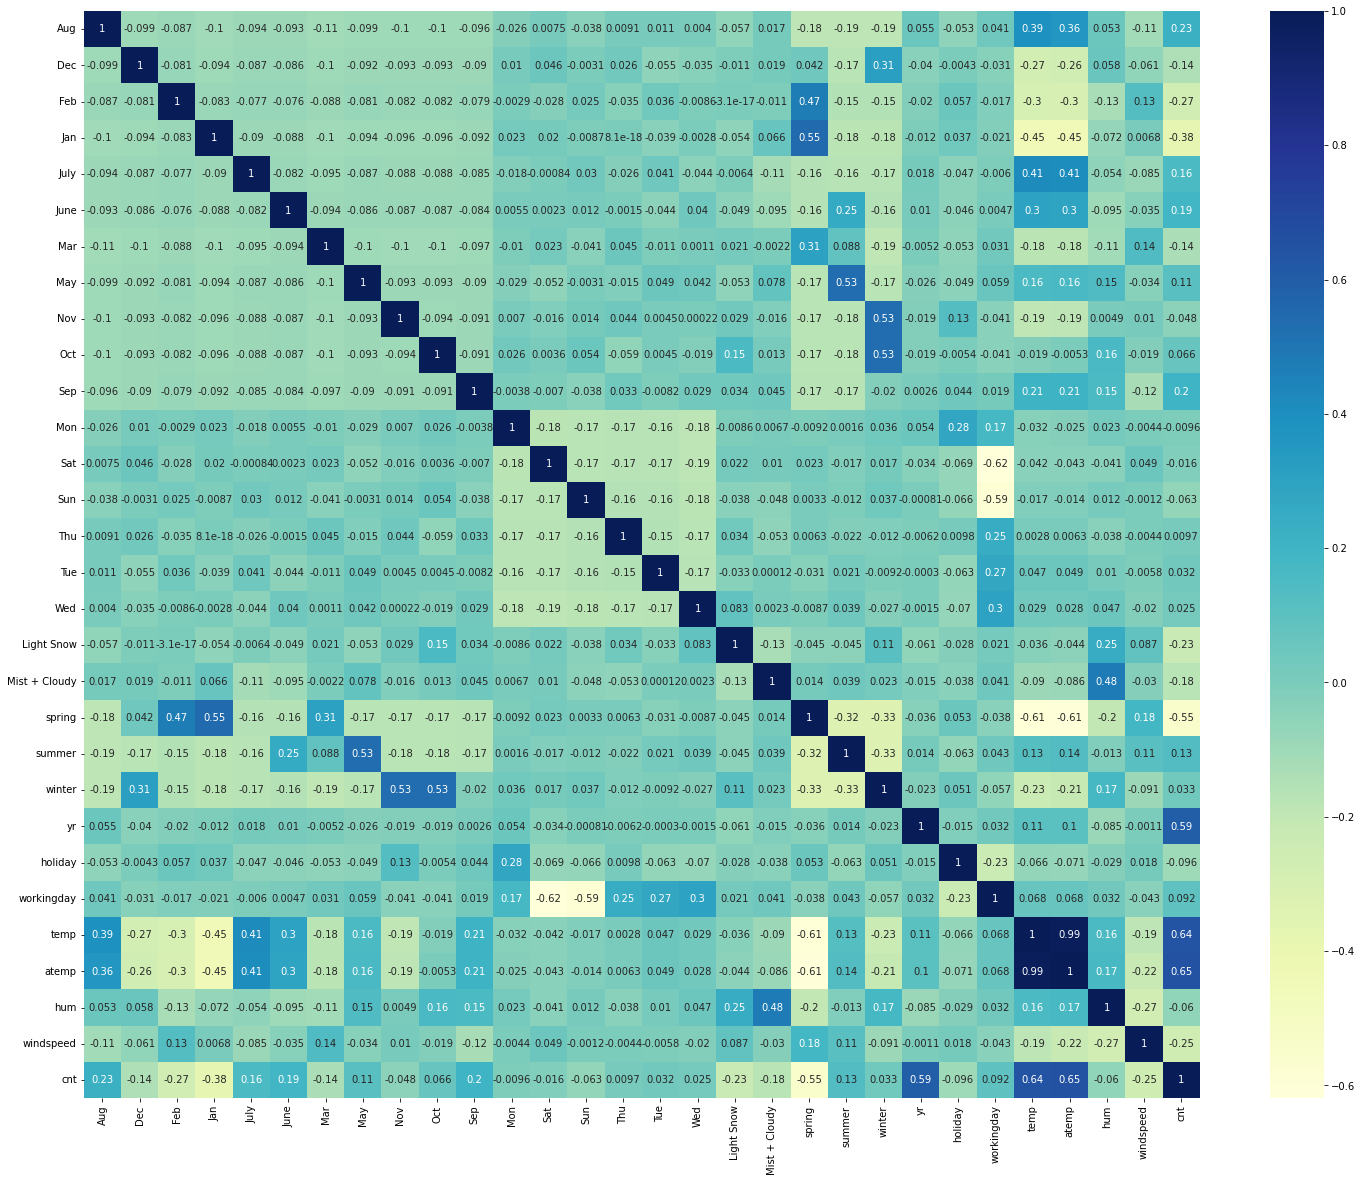

In [30]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25, 20))
sns.heatmap(bike_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

From the correlation matrix temp and atemp are having high correlation to cnt variable.

Dividing into X and Y sets for the model building

In [31]:
y_train = bike_train.pop('cnt')
X_train = bike_train



In [32]:
X_train.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,yr,holiday,workingday,temp,atemp,hum,windspeed
653,0,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,1,0.509887,0.501133,0.575354,0.300794
576,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0.815169,0.766351,0.725633,0.264686
426,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0.442393,0.438975,0.640189,0.255342
728,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0.245101,0.200348,0.498067,0.663106
482,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0.395666,0.391735,0.504508,0.188475


## Building the model

We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE 
(which is a utility from sklearn)

RFE Recursive feature elimination

In [34]:
# Running RFE with selecting 15 variables 
lm = LinearRegression()
lm.fit(X_train, y_train)

np.random.seed(0)
rfe = RFE(lm, 15)             # running RFE,15 is the number of variables we want RFE to select
rfe = rfe.fit(X_train, y_train)

In [35]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Aug', True, 1),
 ('Dec', True, 1),
 ('Feb', False, 3),
 ('Jan', True, 1),
 ('July', False, 5),
 ('June', False, 14),
 ('Mar', False, 15),
 ('May', False, 4),
 ('Nov', False, 2),
 ('Oct', False, 6),
 ('Sep', True, 1),
 ('Mon', False, 13),
 ('Sat', True, 1),
 ('Sun', False, 8),
 ('Thu', False, 11),
 ('Tue', False, 9),
 ('Wed', False, 10),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1),
 ('spring', False, 12),
 ('summer', True, 1),
 ('winter', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [36]:
# Looking at the cols that RFE selected
col = X_train.columns[rfe.support_]
col

Index(['Aug', 'Dec', 'Jan', 'Sep', 'Sat', 'Light Snow', 'Mist + Cloudy',
       'summer', 'winter', 'yr', 'holiday', 'workingday', 'temp', 'hum',
       'windspeed'],
      dtype='object')

In [37]:
X_train.columns[~rfe.support_]

Index(['Feb', 'July', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Mon', 'Sun', 'Thu',
       'Tue', 'Wed', 'spring', 'atemp'],
      dtype='object')

Building model using statsmodel, for the detailed statistics

In [38]:
# Creating X_train_rfe dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [39]:
# Adding a constant variable 
#import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [40]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit() 

## Model - 1

In [41]:

#Looking at the summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.4
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          2.78e-191
Time:                        11:52:15   Log-Likelihood:                 519.69
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2110      0.030      7.035      0.000       0.152       0.270
Aug               0.0499      0.016      3.109      0.002       0.018       0.081
Dec              -0.0233      0.016     -1.467      0.143      -0.055       0.008
Jan              -0.0432      0.018     -2.437      0.015      -0.078      -0.008
Sep               0.1148      0.016      7.165      0.000       0.083       0.146
Sat               0.0537      0.015      3.697      0.000       0.025       0.082
Light Snow       -0.2497      0.026     -9.583      0.000      -0.301      -0.198
Mist + Cloudy    -0.0589      0.010     -5.672      0.000      -0.079      -0.038
summer            0.0934      0.011      8.327      0.000       0.071       0.115
winter            0.1403      0.011     12.210      0.000       0.118       0.163
yr                0.2299      0.008     28.800      0.000       0.214       0.246
holiday          -0.0578      0.027     -2.153      0.032      -0.111      -0.005
workingday        0.0441      0.012      3.833      0.000       0.022       0.067
temp              0.5051      0.025     19.959      0.000       0.455       0.555
hum              -0.1532      0.037     -4.121      0.000      -0.226      -0.080
windspeed        -0.1905      0.025     -7.501      0.000      -0.240      -0.141
==============================================================================
Omnibus:                       67.470   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.956
Skew:                          -0.690   Prob(JB):                     4.12e-36
Kurtosis:                       5.401   Cond. No.                         20.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In the above model , according to the p-values , all the variables except Dec are significant. 
Now we will have a look at the VIF of the variables to find if any multicollinearity exists betweeen any variable.

VIF (Variable Inflation Factor) Calculation

In [42]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,58.26
13,temp,2.11
14,hum,1.90
12,workingday,1.88
5,Sat,1.79
3,Jan,1.64
9,winter,1.60
7,Mist + Cloudy,1.57
8,summer,1.51
1,Aug,1.45


In [43]:
# Dropping the Dec variable
X_train_new = X_train_rfe.drop(["Dec"], axis = 1)

Rebuilding the model without Dec variable
## Model - 2:

In [44]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

##Looking at the summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     197.0
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          5.67e-192
Time:                        11:52:46   Log-Likelihood:                 518.58
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     495   BIC:                            -943.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2053      0.030      6.895      0.000       0.147       0.264
Aug               0.0504      0.016      3.135      0.002       0.019       0.082
Jan              -0.0372      0.017     -2.154      0.032      -0.071      -0.003
Sep               0.1168      0.016      7.310      0.000       0.085       0.148
Sat               0.0526      0.015      3.622      0.000       0.024       0.081
Light Snow       -0.2462      0.026     -9.478      0.000      -0.297      -0.195
Mist + Cloudy    -0.0580      0.010     -5.590      0.000      -0.078      -0.038
summer            0.0956      0.011      8.595      0.000       0.074       0.117
winter            0.1386      0.011     12.110      0.000       0.116       0.161
yr                0.2299      0.008     28.757      0.000       0.214       0.246
holiday          -0.0571      0.027     -2.122      0.034      -0.110      -0.004
workingday        0.0437      0.012      3.789      0.000       0.021       0.066
temp              0.5155      0.024     21.203      0.000       0.468       0.563
hum              -0.1587      0.037     -4.283      0.000      -0.231      -0.086
windspeed        -0.1876      0.025     -7.401      0.000      -0.237      -0.138
==============================================================================
Omnibus:                       63.872   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.179
Skew:                          -0.661   Prob(JB):                     1.49e-33
Kurtosis:                       5.316   Cond. No.                         20.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#Checking VIF again

In [45]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,57.27
12,temp,1.94
11,workingday,1.88
13,hum,1.88
4,Sat,1.78
8,winter,1.58
6,Mist + Cloudy,1.57
2,Jan,1.55
7,summer,1.48
1,Aug,1.45


From the above model ,we see that the P-values of all the 14 variables are very low(approx equal to 0) 
and VIF values are also less than 2 , which is acceptable.

We will now see the F-Statistic value .

F-Statistics is used for testing the overall significance of the Model.

High value for the F-Statistics means the model is more significant and vice-versa.

`F-statistic: 197

`Prob (F-statistic):  5.67e-192

The F-Statistics value of 197 (greater than 1) and the Prob(F-statistic) of '0.000'(very low) states 
that the overall model is significant.

So we can conclude it as our final model with 14 variables .

Model 2 is our final model with :
* R-squared for training set : 0.828 ( 84.8 %)
* Adj R-squared for training set: 0.825 ( 84.4 %)
R-squared = 84.8 which means that 84.8 % of the variance for the target variable ie., 'cnt' is explained by the 
predictor variables , and hence we say that it is a good model.

From the coefficients that we get for the variables, our linear regression equation becomes:

cnt=0.205+0.050*Aug-0.037*Jan+0.117*Sept+0.053*Sat-0.246*Light Snow-0.058*Mist + Cloudy+0.096*summer+0.139*winter+0.230*yr
-0.057*holiday+0.044*workingday+0.516*temp-0.159*hum-0.188*windspeed

# Step 5: Residual Analysis of the training set:

Now we will try to check one of the major assumptions of the linear regression ie.,

-checking whether the error terms are normally distributed

-the probability distribution of the error has constant variance

-the error values are statistically independent 


In [46]:
y_train_count = lm.predict(X_train_lm)

In [47]:
res = y_train-y_train_count

Text(0, 0.5, 'y_train_count')

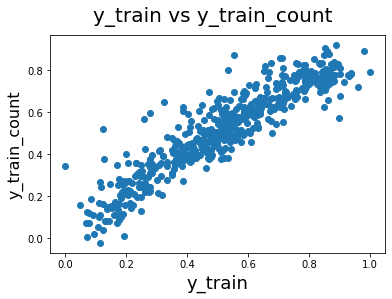

In [48]:

# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_train,y_train_count)
fig.suptitle('y_train vs y_train_count', fontsize=20) 

plt.xlabel('y_train', fontsize=18)                          # X-label
plt.ylabel('y_train_count', fontsize=16)



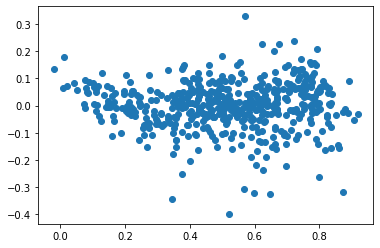

In [50]:
plt.scatter(y_train_count,res)

plt.show()

The probability distribution of the error has constant variance.

Text(0.5, 0, 'Errors')

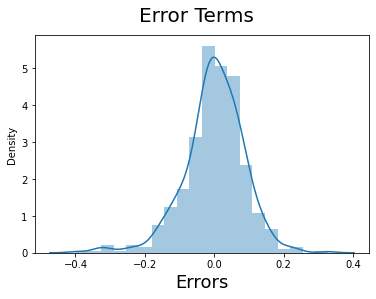

In [55]:
# Plotting the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_count), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)   

Since the errors terms are normally distributed with mean=0, thus our assumption is satisfied in our model.

# Step 6: Making Predictions on Test Set:

Applying the scaling on the test set also

In [56]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

bike_test[num_vars] = scaler.fit_transform(bike_test[num_vars])

Dividing into X_test and y_test

In [57]:
y_test = bike_test.pop('cnt')
X_test = bike_test


In [58]:
X_train_new = X_train_new.drop(["const"], axis = 1)

In [59]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

# Making predictions
y_pred = lm.predict(X_test_new)

Text(0, 0.5, 'y_pred')

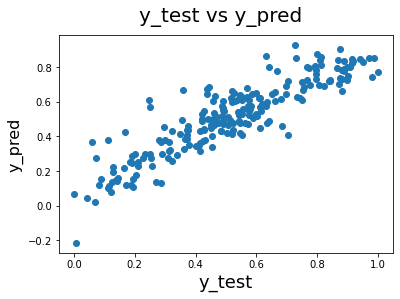

In [60]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20) 

plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # y-label



In [61]:
res=(y_test-y_pred)

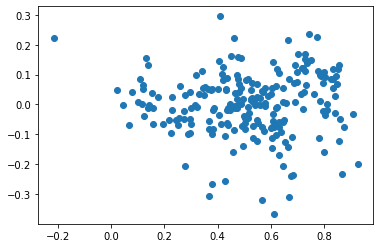

In [62]:
plt.scatter(y_pred,res)

plt.show()

In [63]:
#Calculating R-squared value for Test set
from sklearn.metrics import r2_score

r2=r2_score(y_test, y_pred)
r2

0.8053729397363282

In [64]:
n = X_test_new.shape[0]      # n is number of rows in X_test_new

p = X_test_new.shape[1]     # p= Number of features/predictors which is number of columns in X_test_new

# Calculating Adjusted R-squared value using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7909916298646282

In [65]:
# calculating the Mean Squared Error , Root Mean Squared Error and Mean Absolute error
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.07977833293286174
MSE: 0.011038924590506883
RMSE: 0.10506628665041362


R-squared for training set : 0.828 ( 84.8 %) Adj R-squared for training set: 0.825 ( 84.4 %) 

R-squared for test set : 0.805 ( 80.5 %) Adj R-squared for training set: 0.791 ( 79.1 %)

As we can see that the difference between the R-squared value for the train and test dataset is not more than 5% , 
therefore we can say that this is a good model .

As we can see that the difference between the Adj R-squared value for the train and test dataset is not more than 5% , 
therefore we can say that this is a good model .

# Step 7: Reporting the Final Model:
    
From the coefficients that we get for the variables, our linear regression equation becomes:

cnt=0.205+0.050Aug-0.037Jan+0.117Sept+0.053Sat-0.246Light Snow-0.058Mist + Cloudy+0.096summer+0.139winter+0.230yr -0.057holiday+0.044workingday+ 0.516temp-0.159hum-0.188windspeed

The three most significant variables affecting the demand for shared bikes are :

temp

yr

winter 